# Introduction to Machine Learning via Nearest Neighbours


## Part 1 - Implement k-Nearest Neighbours (kNN) - 30 points

### Note:
This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see references below). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get familiar with a **non-parapmetric** learning algorithm called k-Nearest Neighbours (kNN), and will implement it. You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

For this exercise we will use hypothetical and artificial generated data.
### Nearest Neighbours
The kNN algorithm is simple - given a labeled sample set data, and a new sample, predict the label of this sample by using majority vote (or averaging) over the labels of the k-nearest neighbour of the new data in the sample set.

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either 0 or 1.

Implement a class called KNNClassifier and two methods:
- `fit`: should recieve the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]). 
- `predict`: should recieve a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).

Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set. 

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.

* Bonus for nurdes: use kd-tree for efficiency, see [nearest neighbour search in wiki](https://en.wikipedia.org/wiki/Nearest_neighbor_search)

* Bonus for lazy nurdes: use [scipy's kd implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html)

In [75]:
import numpy as np
from scipy.spatial import KDTree

In [76]:
class kNNClassifier:
  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y
    self.tree = KDTree(X)

  def predict(self, X):
    predictions = np.apply_along_axis(self.predict_one_sample, axis=1, arr=X)
    return predictions

  def predict_one_sample(self, one_X):
    _, index = self.tree.query(one_X, k=self.n_neighbors)
    ypreds = self.y[index]
    y_vals, y_count = np.unique(ypreds, return_counts=True)
    pred = y_vals[y_count.argmax()]
    return pred
  

## Part 2 - Learn and evaluate kNN algorithm on artificial data

kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set (or maybe you could say that the number of parameters increases with the size of the sample set). However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value for it, is choosing the balance between bias and variance as discussed in class.




### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary_voting_pred(wealth, religiousness):
  return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed) 
  
  X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
  y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
  y[y==0] = 1
  samples_to_flip = np.random.randint(0,m//10)
  flip_ind = np.random.choice(m, samples_to_flip, replace=False)
  y[flip_ind] = -y[flip_ind]
  return X, y

def plot_labeled_data(X, y, no_titles=False):
  republicans = (y==1)
  democrats = (y==-1)
  plt.scatter(X[republicans,0], X[republicans,1], c='r')
  plt.scatter(X[democrats,0], X[democrats,1], c='b')
  if not no_titles:
    plt.xlabel('Wealth')
    plt.ylabel('Religiousness')
    plt.title('Red circles represent Republicans, Blues Democrats')
    
  plt.xlim([0, 10]);
  plt.ylim([0, 10]);
  plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

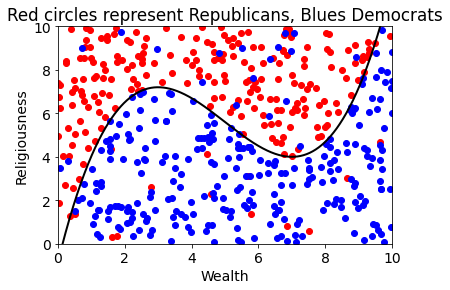

In [78]:
# Play this several times to see different sampling sets
X, y = generate_data(m=500)
plot_labeled_data(X, y)


### 1. Analyse the properties of kNN - 30 points
Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like this:

![decision plane](https://doc-14-14-docs.googleusercontent.com/docs/securesc/flg80o8vb463a3nd3i6da8hemig5me1b/hvii8ll4dscju8o17vuo2aab9aei8hgr/1543334400000/11934753179242311747/03422859225809857490/1chmyojft_R6ftfBhoPZuGN9AykyUS-cw?e=view&nonce=4i4j8lssjk6kc&user=03422859225809857490&hash=k9ogjg94ssot1vocu8uoeg4okkeekg6f)

https://drive.google.com/file/d/1chmyojft_R6ftfBhoPZuGN9AykyUS-cw/view?usp=sharing

Answer the following questions:
- How is the decision plain affected from changes in the sample set, as a function of k?
- Can you describe when do you underfit or overfit the data? 
- How does the complexity of this model depends on k?

* Bonus for nurdes:
Use interactive slider for k to see the effect [see [interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)]

In [79]:
def plot_sub_plot(cax, X_test, y_preds, k):
    '''Plot the current sub-plot '''
    republicans = (y_preds==1)
    democrats = (y_preds==-1)
    cax.scatter(X_test[republicans,0], X_test[republicans,1], c='r', alpha = 0.5)
    cax.scatter(X_test[democrats,0], X_test[democrats,1], c='b', alpha = 0.5)
    cax.axis(xmin=0,xmax=10)
    cax.axis(ymin=0,ymax=10)
    cax.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k')
    cax.set_title(f'k = {k}')

In [80]:
plt.rcParams.update({'font.size': 12})

def create_data_and_plot(ks):
    '''Create the data and send to plot'''

    X_train, y_train = generate_data(m=500)
    factor = 4  # Multiple the number of points by factor 
    size = 10 

    # Creatig the grid
    x0, x1 = np.mgrid[0:(size*factor), 0:(size*factor)]
    X_test = np.c_[x0.ravel(), x1.ravel()]
    X_test = X_test/factor

    # Plotting
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))

    # Predicting
    i = 0
    for k in ks:
        knn = kNNClassifier(k)
        knn.fit(X_train, y_train)
        y_preds = knn.predict(X_test)
        cax = axs[i//3, i%3]  # Current axis
        plot_sub_plot(cax, X_test, y_preds, k)
        i += 1
    

    plt.show();

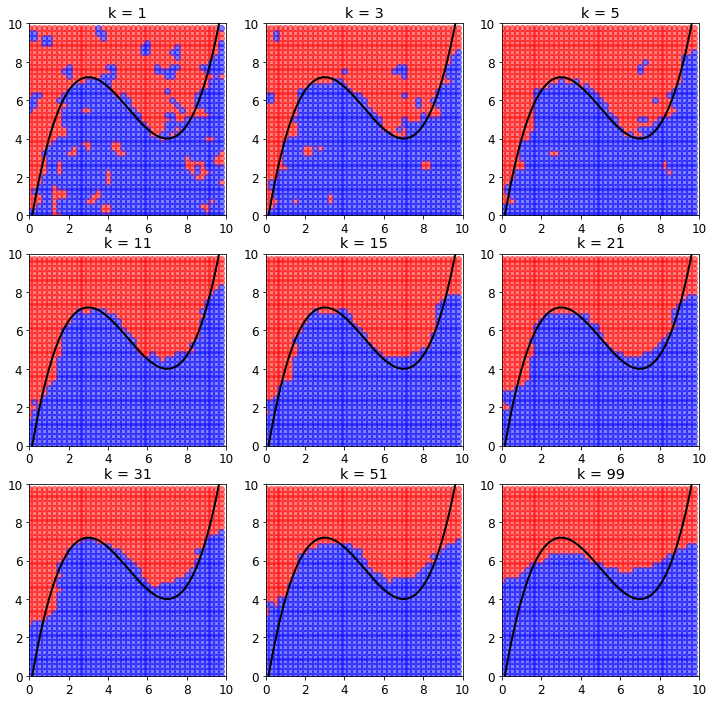

In [81]:

create_data_and_plot(ks=[1, 3, 5, 11, 15, 21, 31, 51, 99])

**How is the decision plain affected from changes in the sample set, as a function of k?**
We can see that small k creates a more 'noisy' decision plain, which reflects sensitivity to  outlies (the flipped points that represent unknown effect of features which are not measured). In other words, the decision plain with a small k is more sensitive to the sample data. Large k is not as sensitive to the sample data but it creates a less accuarate decision plain. The decision planes of the lower k values show a high variance and high overfitt. As the k values increases, the variance decreases, but the separation is getting more an more biased, as the model is undefitting.  
  
**Can you describe when do you underfit or overfit the data?**
We evaluate that the model overfit the data in the cases of very small k, probably between 1 and 3, and underfit the data in cases where k is bigger than 11 to 15. 
  
**How does the complexity of this model depends on k?**
We concluded that there is an inverse relationship between the k and the model complexity.
As k is smaller the model looks at smaller local suroundings which leads to more groups/neigbours increasing the complexity. While, as k is larger the model looks at larger suroundings leading to fewer groups, lowering the model complexity.

### 2. Finding the optimal k - 15 points
Sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets. Plot the train vs validation error for several k values, and choose the best k. Where do you underfit/overfit the data? Finally, estimate the generalization error of your chosen classifier using the test set. What would happen if you optimize directly on test? is the optimal k the same?


In [82]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

A function for calculating the error, based on mean number of mismathces

In [83]:
def calc_error(calc_preds, true_preds):
    '''Calculates the error based on mean number of mismathces'''
    #err = np.mean(calc_preds != true_preds)
    err = np.mean((calc_preds - true_preds)**2)
    return err

A function for plotting the error size of the train and validation sets

In [84]:
plt.rcParams.update({'font.size': 14})

def plot_k_error(y_train_preds, y_valid_preds):
    ''' Plots the errors '''

    ks = np.array(list(y_train_preds.keys()))
    train_err = np.array(list(y_train_preds.values()))
    val_err = np.array(list(y_valid_preds.values()))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(ks, train_err, label = 'Training')
    ax1.plot(ks, val_err, label = 'Validation')
    ax1.set_ylabel('Error')
    ax1.set_xlabel('k')

    maxk = 10
    ax2.plot(ks[:maxk], train_err[:maxk], label = 'Training')
    ax2.plot(ks[:maxk], val_err[:maxk], label = 'Validation')
    ax2.set_title(f'0 < k < {max(ks[:maxk]) + 1}')
    ax2.set_xlabel('k')

    #handles, labels = ax1.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.2))
    

    plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1))

    plt.tight_layout()

    plt.show();


A function for predicting and evaluating the error

In [85]:
def run_prediction_per_k(X_train, y_train, X_val, y_val, k):
    ''' Runs the prediction and evaluates the errors, 
    returns the val prediction and train and val errors  '''
    knn = kNNClassifier(k)
    knn.fit(X_train, y_train)
    y_train_preds = knn.predict(X_train)
    y_val_preds = knn.predict(X_val)
    err_train = calc_error(y_train_preds, y_train)
    err_val = calc_error(y_val_preds, y_val)
    return y_val_preds, err_train, err_val

A function for calulating the general error (based on the test set)

In [86]:
def general_error(x_train, y_train, x_test, y_test, k):
    ''' Runs the prediction and evaluates the error '''
    knn = kNNClassifier(k)
    knn.fit(x_train, y_train)
    y_test_preds = knn.predict(x_test)
    mse_test = calc_error(y_test_preds, y_test)
    return mse_test

A function for generating the data, splittig the data, evaluating the error and the accuracy, and plotting the error.

In [87]:
def data_and_results():
    X, y = generate_data(m=1000, seed=0)
    
    # Defines ratios, w.r.t. whole dataset.
    ratio_train = 0.6
    ratio_val = 0.2
    ratio_test = 0.2
    
    # Produces test split.
    x_remaining, x_test, y_remaining, y_test = train_test_split(
        X, y, test_size=ratio_test)

    # Adjusts val ratio, w.r.t. remaining dataset.
    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining

    # Produces train and val splits.
    x_train, x_valid, y_train, y_valid = train_test_split(
        x_remaining, y_remaining, test_size=ratio_val_adjusted)
    
    ks = np.arange(1, 99, 2)
    
    # Compare train error to validation error and get accuracy
    y_train_error, y_valid_error = {}, {}
    accuracy = []
    for k in ks:
        y_pred, yterr, yverr = run_prediction_per_k(x_train, y_train, x_valid, y_valid, k)
        y_train_error[k] = yterr
        y_valid_error[k] = yverr
        accuracy.append(accuracy_score(y_valid, y_pred))
        
    plot_k_error(y_train_error, y_valid_error)
    
    # find k with highest acuuracy based on validation data
    k_accurate, best_acuracy = ks[np.argmax(accuracy)], accuracy[np.argmax(accuracy)]
    print('the best k based on validation data', k_accurate)
    print('the best k accuracy ', best_acuracy)
    
    # calc general error
    mse_test = general_error(x_train, y_train, x_test, y_test, k_accurate)
    print('general error', mse_test)
    
    # find k with highest acuuracy based on test data
    # Compare train error to validation error and get accuracy
    y_train_error, y_test_error = {}, {}
    accuracy = []
    for k in ks:
        y_pred, yterr, yverr = run_prediction_per_k(x_train, y_train, x_test, y_test, k)
        y_train_error[k] = yterr
        y_test_error[k] = yverr
        accuracy.append(accuracy_score(y_test, y_pred))
    
    # find k with highest acuuracy based on test data
    k_accurate, best_acuracy = ks[np.argmax(accuracy)], accuracy[np.argmax(accuracy)]
    print('the best k based on test data', k_accurate)
    print('the best k accuracy ', best_acuracy)
    
    # calc general error
    mse_test = general_error(x_train, y_train, x_test, y_test, k_accurate)
    print('general error', mse_test)
    

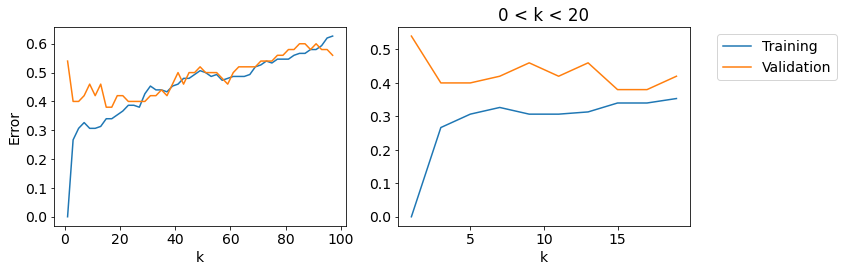

the best k based on validation data 15
the best k accuracy  0.905
general error 0.28
the best k based on test data 11
the best k accuracy  0.94
general error 0.24


In [88]:
data_and_results()

**Where do you underfit/overfit the data?**  
We underfit the data when the k is larger than about 15 (based on our model), where the training error is close or higher than the validation error. We overfit the data when k is smaller than about 3, where the difference between the train and the test sets is larger.   
**What would happen if you optimize directly on test? is the optimal k the same?**  
If we optimize directly on the test data we get leakage, and our evaluation of the model will be comprsmized. The optimal k is not the same.

### 3. Using cross validation - 25 points
This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value. 
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.

In [89]:
from sklearn.model_selection import KFold

Creating kNN object and use it for fitting and predicting

In [90]:
def val_prediction(X_train, y_train, X_val, k):
    ''' return y_val prediction '''
    knn = kNNClassifier(k)
    knn.fit(X_train, y_train)
    y_val_preds = knn.predict(X_val)
    return y_val_preds

Predicting and finding the accuracy of each given k, and returning the most accurate k and the highest accuracy

In [91]:
def find_k_accurate(x_train, y_train, x_valid, y_valid, ks):    
    # find k with highest accuracy
    accuracy = []
    for k in ks:
        y_pred = val_prediction(x_train, y_train, x_valid, k)
        accuracy.append(accuracy_score(y_valid, y_pred))

    return ks[np.argmax(accuracy)], accuracy[np.argmax(accuracy)]

Predicting and finding the error of each given k, and returning the least error k and the error score

In [92]:
def find_best_k_by_error(x_train, y_train, x_valid, y_valid, ks):    
    # find k with highest accuracy
    errors = []
    for k in ks:
        y_pred = val_prediction(x_train, y_train, x_valid, k)
        errors.append(calc_error(y_valid, y_pred))

    return ks[np.argmin(errors)], errors[np.argmax(errors)]

Generating the data, creating the cross-validation splits and evatuating the accuracy of each iteration.

In [93]:
def data_and_cross_validation_results():
    X, y = generate_data(m=1000, seed=0)
    # Defines ratios, w.r.t. whole dataset.
    ratio_train = 0.8
    ratio_test = 0.2
    
    # Produces test split.
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=ratio_test)

    kf = KFold(n_splits=5)
    ks = np.arange(1, 99, 2)
    
    k_accurates, best_accuracies, mse_tests = [], [], []

    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print('---- iteration number ', i, '----')
        
        # find k with highest acuuracy based on validation data
        k_accurate, best_acuracy = find_k_accurate(x_train[train_index], y_train[train_index], 
                                     x_train[test_index], y_train[test_index], ks)
        
        print('the best k based on validation data and accuary', k_accurate)

        # By accuracy
        print('the best k accuracy ', best_acuracy)
        k_accurates.append(k_accurate)
        best_accuracies.append(best_acuracy)

        # calc general error
        mse_tests.append(general_error(x_train, y_train, x_test, y_test, k_accurate))

        print('general error for least error k', mse_tests[i])
    
    print('\n')
    # find k with highest accuracy over all
    k_most_accurate = k_accurates[np.argmax(best_accuracies)]
    print('the most accurate k from cross validation', k_most_accurate)
    print('the best k accuracy ', best_accuracies[np.argmax(best_accuracies)])

    k_least_error = k_accurates[np.argmax(mse_tests)]
    print('the lowest error k from cross validation', k_least_error)
    print('the best k MSE ', mse_tests[np.argmax(mse_tests)])
    
    # calc general error
    mse_test = general_error(x_train, y_train, x_test, y_test, k_most_accurate)
    print('general error', mse_test)

    # Finding the most common k  
    count = np.bincount(k_accurates)
    if max(count > 1):
          print("Most frequent k among the best k values:", count.argmax())
    

In [94]:
data_and_cross_validation_results()

---- iteration number  0 ----
the best k based on validation data and accuary 11
the best k accuracy  0.88125
general error for least error k 0.34
---- iteration number  1 ----
the best k based on validation data and accuary 3
the best k accuracy  0.9
general error for least error k 0.4
---- iteration number  2 ----
the best k based on validation data and accuary 5
the best k accuracy  0.925
general error for least error k 0.38
---- iteration number  3 ----
the best k based on validation data and accuary 3
the best k accuracy  0.90625
general error for least error k 0.4
---- iteration number  4 ----
the best k based on validation data and accuary 11
the best k accuracy  0.91875
general error for least error k 0.34


the most accurate k from cross validation 5
the best k accuracy  0.925
the lowest error k from cross validation 3
the best k MSE  0.4
general error 0.38
Most frequent k among the best k values: 3


**What is the size of the validation and train set now, in each CV iteration? **

The size of the validation is 160 and the train set is 640 in each CV iteration.

**Did your final model selection change? Explain why.**
Yes.
In the area where k is relatively small, there's high variance and the model is more sensitive to the sampling data and therefore for different training sets we get different k's. 
In this case the number of sample data makes a difference, and as we enlarge our data the k analysis will probably converge.


## References
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://scott.fortmann-roe.com/docs/MeasuringError.html
- http://scikit-learn.org/stable/modules/cross_validation.html